In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data

data = np.loadtxt('training_data.txt', skiprows=1)

In [3]:
x_train = data[:,range(1,1001)]
y_train = data[:,0]

In [ ]:
# Load words

import numpy as np
import csv

# Import data and labels
training_data = np.loadtxt('data/training_data.txt', skiprows=1)
with open('data/training_data.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    labels = next(reader)

In [48]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Test Normalization

from sklearn import preprocessing

# KFold cross validation

# from sklearn.model_selection import KFold
    
# kf = KFold(n_splits = 5, shuffle=True)
# inds = [ind for ind in kf.split(x_train, y_train)]

# for fold in range(5):
#     x_train_folds = x_train[inds[fold][0]]
#     x_val_folds = x_train[inds[fold][1]]
#     y_train_folds = y_train[inds[fold][0]]
#     y_val_folds = y_train[inds[fold][1]]
    
# print(len(x_train_folds))

# Split the data

from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# w/o normalization

# l1 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s, y_train_s)

print(model.score(x_val, y_val))

# l2 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s, y_train_s)

print(model.score(x_val, y_val))

# w/ normalization

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# l1 regularization

model = LogisticRegression(penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

# l2 regularization

model = LogisticRegression(penalty='l2')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

# Recoded data: 0 and 1 to -1 and 1

y_train_neg1 = y_train
y_train_neg1[y_train == 0] = -1

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train_neg1, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Best model

model = LogisticRegression(penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

0.84725
0.84725
0.84775
0.84675
0.84775


In [90]:
# Optimize regularization parameter Logistic Regression of best model 
# (l1-regularized, normalized data)

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)
    
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s_norm, y_train_s)
    opt_c.append(model.score(x_val_norm, y_val))

In [91]:
np.argmax(opt_c), opt_c[7], cs[7]

(7, 0.84950000000000003, 3.90625)

In [96]:
# Optimize regularization parameter Logistic Regression of best model 
# (l1-regularized, non normalized data)

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)
    
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s, y_train_s)
    opt_c.append(model.score(x_val, y_val))

In [4]:
# Predict on test set

data_train = np.loadtxt('training_data.txt', skiprows=1)
data_test = np.loadtxt('test_data.txt', skiprows=1)

In [5]:
x_train = data_train[:,range(1,1001)]
y_train = data_train[:,0]

x_test = data_test

In [133]:
# Best Logistic Regression Model

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Logistic_Regression.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [264]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=3.1, penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

0.8471875


In [65]:
# Eric's best Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.33, penalty='l1')
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm, y_val))

0.8303125


In [109]:
# Trying different C 

# Best Logistic Regression Model

model = LogisticRegression(penalty='l1', C=0.28436)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Logistic_Regression_Eric_opt.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [265]:
# Trying different C 

# Best Logistic Regression Model

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model = LogisticRegression(penalty='l1', C=3.1)
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Logistic_Regression2.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [220]:
# SVC

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC()
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.503125


In [223]:
# Linear SVM, l1 reg

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.84875


In [268]:
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.LinearSVC(C=0.77, penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.8485


In [ ]:
# Trying different C 

# Best SVC

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

clf = svm.LinearSVC(C=0.77, penalty='l1', loss='squared_hinge', dual=False)
clf.fit(x_train_s_norm, y_train_s)

y_pred = clf.predict(x_test)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_LinearSVC.csv', index=False, header=True)

In [225]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.LinearSVC(C=ci, penalty='l1', loss='squared_hinge', dual=False)
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [236]:
opt_c

[0.49687500000000001,
 0.49687500000000001,
 0.49687500000000001,
 0.67500000000000004,
 0.79843750000000002,
 0.84593750000000001,
 0.84968750000000004,
 0.84406250000000005,
 0.84406250000000005,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375]

In [226]:
np.argmax(opt_c)

(6, 0.84406250000000005, 3.90625)

In [269]:
# SVC, rbf kernel

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC(C=1, kernel='rbf')
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.497


In [ ]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='rbf')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [270]:
# SVC, linear kernel

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.85125


In [6]:
# Optimizing

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cs = []
ci = 0.01
for i in range(4):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='linear')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [10]:
np.argmax(opt_c), opt_c[2], cs[2], opt_c

(2,
 0.84799999999999998,
 1.25,
 [0.82874999999999999,
  0.84724999999999995,
  0.84799999999999998,
  0.84350000000000003])

In [12]:
# Optimal  SVC, linear kernel, C=1

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_norm, y_train)

y_pred = clf.predict(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_LinearSVC.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [ ]:
# Optimizing

cs = []
ci = 0.00001
for i in range(18):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    clf = svm.SVC(C=ci, kernel='linear')
    clf.fit(x_train_s_norm, y_train_s)
    opt_c.append(clf.score(x_val_norm, y_val))

In [15]:
# Random Forest

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.8334375


In [127]:
from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

# Best Random Forest

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train_norm, y_train)

y_pred = clf.predict(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_random_forest.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           1
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [17]:
def classification_err(y, real_y):
    
    return (len(y) - np.sum(np.equal(y, real_y)))/(len(y))
    
    pass

def eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    
    train_err = []
    test_err = []
    for i in min_samples_leaf:
        clf = clf
        clf.min_samples_leaf = i
        clf.fit(X_train, y_train)
        train_err.append(classification_err(clf.predict(X_train), y_train))
        test_err.append(classification_err(clf.predict(X_test), y_test))
    
    return train_err, test_err
    pass

In [27]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):

    train_err = []
    test_err = []
    for i in max_depth:
        clf = clf
        clf.max_depth = i
        clf.fit(X_train, y_train)
        train_err.append(classification_err(clf.predict(X_train), y_train))
        test_err.append(classification_err(clf.predict(X_test), y_test))
    
    return train_err, test_err
    pass

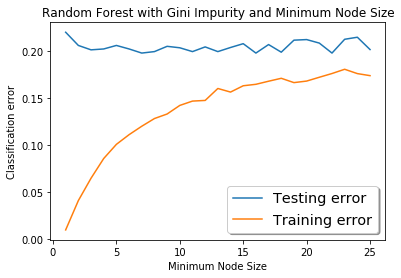

Test error minimized at min_samples_leaf = 7


In [36]:
# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')


n_estimators = 10
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

min_samples_leaf = np.arange(1, 26)

train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, x_train_s_norm, 
                                                        y_train_s, x_val_norm, y_val)

plt.figure()
plt.plot(min_samples_leaf, test_err, label='Testing error')
plt.plot(min_samples_leaf, train_err, label='Training error')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.savefig("2D")
plt.show()

print('Test error minimized at min_samples_leaf = %i' % min_samples_leaf[np.argmin(test_err)])

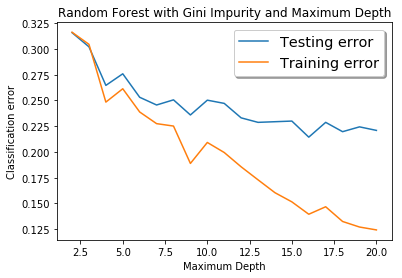

Test error minimized at max_depth = 16


In [37]:
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 21)

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, x_train_s_norm, 
                                                        y_train_s, x_val_norm, y_val)

plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Depth')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.savefig('2E')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

In [33]:
# Try optimal Random Forest

# Normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

# clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=7, max_depth=30)
clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=7, max_depth=30)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

0.825625


In [13]:
# Grid Search

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_norm = preprocessing.normalize(x_train, norm='l2')

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(x_train_norm, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(x_train_norm, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 27.71 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.814 (std: 0.005)
Parameters: {'max_features': 9, 'min_samples_leaf': 8, 'bootstrap': False, 'min_samples_split': 4, 'criterion': 'gini', 'max_depth': None}

Model with rank: 2
Mean validation score: 0.811 (std: 0.002)
Parameters: {'max_features': 5, 'min_samples_leaf': 3, 'bootstrap': True, 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.807 (std: 0.002)
Parameters: {'max_features': 4, 'min_samples_leaf': 7, 'bootstrap': True, 'min_samples_split': 4, 'criterion': 'entropy', 'max_depth': None}



KeyboardInterrupt: 

In [39]:
# Naive Bayes
# Find most informative features

import nltk 

# normalize data

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

# Base (1000 Classifiers)

# clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=7, max_depth=30)
clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=7, max_depth=30)
clf.fit(x_train_s_norm, y_train_s)

print(clf.score(x_val_norm, y_val))

In [6]:
# Gaussian NB

# normalize data

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_s_norm, y_train_s)

gnb.score(x_val_norm, y_val)

0.78343750000000001

In [583]:
# Multinomial NB

# normalize data

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.000001)
mnb.fit(x_train_s_norm, y_train_s)

mnb.score(x_val_norm, y_val)

0.84075

In [577]:
# Optimizing

cs = []
ci = 0.0000001
for i in range(5):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    mnb = MultinomialNB(alpha=ci)
    mnb.fit(x_train_s_norm, y_train_s)
    opt_c.append(mnb.score(x_val_norm, y_val))

In [579]:
np.argmax(opt_c), opt_c[0], cs[0], opt_c, cs

(0,
 0.84075,
 5e-07,
 [0.84075, 0.84075, 0.84075, 0.84075, 0.84075],
 [5e-07, 2.4999999999999998e-06, 1.2499999999999999e-05, 6.25e-05, 0.0003125])

In [587]:
# Best MultinomialNB

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.000001)
mnb.fit(x_train_norm, y_train)

y_pred = mnb.predict(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_Multinomial_NB.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           1
3   4           0
4   5           1
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [22]:
# Bernoulli NB

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.00001)
bnb.fit(x_train_s_norm, y_train_s)

bnb.score(x_val_norm, y_val)

0.82343750000000004

In [13]:
# Optimizing

cs = []
ci = 0.0000001
for i in range(5):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    bnb = BernoulliNB(alpha=ci)
    bnb.fit(x_train_s_norm, y_train_s)
    opt_c.append(bnb.score(x_val_norm, y_val))

In [15]:
np.argmax(opt_c), opt_c[0], cs[0], opt_c

(0,
 0.82343750000000004,
 5e-07,
 [0.82343750000000004,
  0.82343750000000004,
  0.82343750000000004,
  0.82343750000000004,
  0.82343750000000004])

In [43]:
# Load words

In [70]:
bag_of_words = []
with open('data_train.txt','r') as f:
    for line in f:
        for word in line.split():
             bag_of_words.append(word)
                
bag_of_words = bag_of_words[:1000]

In [72]:
bag_of_words[:10]

['Label', 'thi', 'book', 'wa', 'one', 'read', 'movi', 'like', 'great', 'good']

In [79]:
x_train[0][:10], y_train[0]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 1.0)

In [209]:
sent = []
for i in range(len(x_train)):
    for w in range(len(bag_of_words)):
        if x_train[i][w] == 0:
            sent.append(({bag_of_words[w]: False}, y_train[i]))
        elif x_train[i][w] == 1:
            sent.append(({bag_of_words[w]: True}, y_train[i]))

# [({'this': True, 'love': True, 'view': False}, 'pos'), . . .]

In [213]:
sent[:10]

[({'Label': False}, 1.0),
 ({'thi': False}, 1.0),
 ({'book': False}, 1.0),
 ({'wa': False}, 1.0),
 ({'one': False}, 1.0),
 ({'read': False}, 1.0),
 ({'movi': False}, 1.0),
 ({'like': False}, 1.0),
 ({'great': False}, 1.0),
 ({'good': False}, 1.0)]

In [214]:
classifier = nltk.NaiveBayesClassifier.train(sent)

In [216]:
#  Most informative words

classifier.show_most_informative_features(10)

Most Informative Features
                    loud = True              0.0 : 1.0    =     45.8 : 1.0
                    room = True              0.0 : 1.0    =     26.2 : 1.0
                    show = True              0.0 : 1.0    =     23.0 : 1.0
                    tool = True              0.0 : 1.0    =     13.9 : 1.0
                 impress = True              0.0 : 1.0    =     13.6 : 1.0
                    tell = True              0.0 : 1.0    =     13.0 : 1.0
                    area = True              1.0 : 0.0    =     12.1 : 1.0
                    emot = True              0.0 : 1.0    =     11.4 : 1.0
                  singer = True              0.0 : 1.0    =     11.2 : 1.0
                    fine = True              0.0 : 1.0    =      9.6 : 1.0


In [ ]:
sent_val = []
for i in range(len(x_val)):
    for w in range(len(bag_of_words)):
        if x_train[i][w] == 0:
            sent.append(({bag_of_words[w]: False}, y_train[i]))
        elif x_train[i][w] == 1:
            sent.append(({bag_of_words[w]: True}, y_train[i]))

In [219]:
nltk.classify.accuracy(classifier, sent)

0.50697712663941019

In [575]:
# GBM

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_depth=3, random_state=0)

clf.fit(x_train_s_norm, y_train_s)

clf.score(x_val_norm, y_val)

0.81674999999999998

In [598]:
# Best GBM

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_depth=3, random_state=0)
clf.fit(x_train_norm, y_train)

y_pred = clf.predict(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_GBM.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [40]:
# AdaBoost

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, learning_rate=1)
                   
clf.fit(x_train_s_norm, y_train_s)

clf.score(x_val_norm, y_val)                   

0.80312499999999998

In [188]:
# Stack Logistic Regression, Random Forest, LinearSVM

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=30)

,Id,Prediction0,Prediction1,Prediction2
0,1,1,1,1
1,2,1,1,1
2,3,0,0,0
3,4,0,0,0
4,5,0,0,1
5,6,0,0,0
6,7,1,1,1
7,8,1,1,1
8,9,1,1,1
9,10,0,0,0


In [176]:
pred_svm = concat_sub.Prediction0
pred_log = concat_sub.Prediction1
pred_rfo = concat_sub.Prediction2
disagree_svm_log = np.logical_not(np.equal(pred_svm, pred_log))
print(len(disagree_svm_log))
print(np.sum(disagree_svm_log))

10000
483


In [212]:
predictDF = np.array(concat_sub.iloc[:, 1:4])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [213]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_svm_logreg_rfo.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [157]:
# check correlation

concat_sub.corr()

,Id,Prediction0,Prediction1,Prediction2
Id,1.000000,0.006020,0.005802,0.017638
Prediction0,0.006020,1.000000,0.905069,0.768188
Prediction1,0.005802,0.905069,1.000000,0.786237
Prediction2,0.017638,0.768188,0.786237,1.000000


In [158]:
cutoff_lo = 0.8
cutoff_hi = 0.2

In [168]:
# get the data fields ready for stacking
concat_sub['Prediction_max'] = concat_sub.iloc[:, 1:3].max(axis=1)
concat_sub['Prediction_min'] = concat_sub.iloc[:, 1:3].min(axis=1)
concat_sub['Prediction_mean'] = concat_sub.iloc[:, 1:3].mean(axis=1)
concat_sub['Prediction_median'] = concat_sub.iloc[:, 1:3].median(axis=1)

In [177]:
concat_sub['Prediction'] = np.where(np.all(concat_sub.iloc[:,1:3] > cutoff_lo, axis=1), 
                                    concat_sub['Prediction_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:3] < cutoff_hi, axis=1),
                                             concat_sub['Prediction_min'], 
                                             concat_sub['Prediction_median']))
concat_sub[['Id', 'Prediction']].to_csv('stack_minmax_median_round.csv', 
                                        index=False, float_format='%.6f')
# # Round 0.5 down to 0
# concat_sub[['Id', 'Prediction']].round().to_csv('stack_minmax_median_round.csv', 
#                                         index=False, float_format='%.6f')

In [178]:
concat_sub[['Id', 'Prediction']]

,Id,Prediction
0,1,1.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,0.0


In [ ]:
# How many diagreements


In [8]:
# Neural Networks

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten

Using TensorFlow backend.


In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

y_train_s_hot = np_utils.to_categorical(y_train_s)
y_val_hot = np_utils.to_categorical(y_val)

In [20]:
print(x_train_s.shape), print(y_train_s.shape)

(16000, 1000)
(16000,)


(None, None)

In [51]:
# Dense NN

model = Sequential()
model.add(Dense(120, input_shape=(1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 120)               120120    
_________________________________________________________________
activation_85 (Activation)   (None, 120)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 60)                7260      
_________________________________________________________________
activation_86 (Activation)   (None, 60)                0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 20)                1220      
__________

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_s_norm, y_train_s_hot, batch_size=32, nb_epoch=1, verbose=1)

model.evaluate(x_val_norm, y_val_hot)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
4000/4000 [==============================] - 1s 244us/step


[0.33595985072851181, 0.85099999999999998]

In [80]:
# Optimze epochs

accuracies4 = []
models4 = []

for i in np.arange(1, 21):
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=i, batch_size=32, verbose=1)
    
    accuracies4.append(model.evaluate(x_val_norm, y_val_hot)[1])
    models4.append(model)

Epoch 1/1
4000/4000 [==============================] - 2s 457us/step
Epoch 1/2
16000/16000 [==============================] - 7s 457us/step - loss: 0.4817 - acc: 0.7654
Epoch 2/2
4000/4000 [==============================] - 2s 445us/step
Epoch 1/3
16000/16000 [==============================] - 7s 451us/step - loss: 0.4875 - acc: 0.7551
Epoch 2/3
16000/16000 [==============================] - 4s 238us/step - loss: 0.3501 - acc: 0.8510
Epoch 3/3
4000/4000 [==============================] - 2s 457us/step
Epoch 1/4
16000/16000 [==============================] - 8s 484us/step - loss: 0.4871 - acc: 0.7595
Epoch 2/4
16000/16000 [==============================] - 4s 241us/step - loss: 0.3464 - acc: 0.8501
Epoch 3/4
16000/16000 [==============================] - 4s 249us/step - loss: 0.3194 - acc: 0.8633
Epoch 4/4
4000/4000 [==============================] - 2s 454us/step
Epoch 1/5
16000/16000 [==============================] - 8s 471us/step - loss: 0.4751 - acc: 0.7695
Epoch 2/5
16000/16000 [=

16000/16000 [==============================] - 4s 252us/step - loss: 0.2096 - acc: 0.9199
Epoch 10/12
16000/16000 [==============================] - 4s 247us/step - loss: 0.1935 - acc: 0.9268
Epoch 11/12
16000/16000 [==============================] - 4s 259us/step - loss: 0.1799 - acc: 0.9337
Epoch 12/12
4000/4000 [==============================] - 2s 517us/step
Epoch 1/13
16000/16000 [==============================] - 8s 470us/step - loss: 0.4839 - acc: 0.7618
Epoch 2/13
16000/16000 [==============================] - 4s 252us/step - loss: 0.3529 - acc: 0.8472
Epoch 3/13
16000/16000 [==============================] - 4s 247us/step - loss: 0.3167 - acc: 0.8654
Epoch 4/13
16000/16000 [==============================] - 4s 244us/step - loss: 0.2950 - acc: 0.8784
Epoch 5/13
16000/16000 [==============================] - 4s 243us/step - loss: 0.2777 - acc: 0.8872
Epoch 6/13
16000/16000 [==============================] - 4s 241us/step - loss: 0.2606 - acc: 0.8945
Epoch 7/13
16000/16000 [=====

Epoch 17/17
4000/4000 [==============================] - 2s 524us/step
Epoch 1/18
16000/16000 [==============================] - 9s 555us/step - loss: 0.4828 - acc: 0.7629
Epoch 2/18
16000/16000 [==============================] - 4s 254us/step - loss: 0.3521 - acc: 0.8453
Epoch 3/18
16000/16000 [==============================] - 4s 255us/step - loss: 0.3170 - acc: 0.8645
Epoch 4/18
16000/16000 [==============================] - 5s 292us/step - loss: 0.2959 - acc: 0.8755
Epoch 5/18
16000/16000 [==============================] - 4s 253us/step - loss: 0.2757 - acc: 0.8868
Epoch 6/18
16000/16000 [==============================] - 4s 239us/step - loss: 0.2571 - acc: 0.8936
Epoch 7/18
16000/16000 [==============================] - 4s 249us/step - loss: 0.2440 - acc: 0.9034
Epoch 8/18
16000/16000 [==============================] - 4s 270us/step - loss: 0.2245 - acc: 0.9121
Epoch 9/18
16000/16000 [==============================] - 5s 325us/step - loss: 0.2078 - acc: 0.9182
Epoch 10/18
16000/16

In [81]:
np.argmax(accuracies4)

4

In [82]:
np.arange(1, 21)[4]

5

In [83]:
models4[4].evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 124us/step


[0.33541927671432498, 0.85750000000000004]

In [30]:
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.7))
    model.add(Dense(20))
    model.add(Activation('sigmoid'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
16000/16000 [==============================] - 4s 260us/step - loss: 0.6915 - acc: 0.5381
Epoch 2/5
16000/16000 [==============================] - 3s 202us/step - loss: 0.6446 - acc: 0.6243
Epoch 3/5
16000/16000 [==============================] - 3s 209us/step - loss: 0.5575 - acc: 0.7147
Epoch 4/5
16000/16000 [==============================] - 3s 204us/step - loss: 0.4915 - acc: 0.7645
Epoch 5/5
16000/16000 [==============================] - 3s 205us/step - loss: 0.4636 - acc: 0.7822


In [31]:
model.evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 103us/step


[0.37439831280708313, 0.84325000000000006]

In [11]:
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
16000/16000 [==============================] - 4s 263us/step - loss: 0.4804 - acc: 0.7681
Epoch 2/5
16000/16000 [==============================] - 3s 202us/step - loss: 0.3486 - acc: 0.8508
Epoch 3/5
16000/16000 [==============================] - 3s 199us/step - loss: 0.3160 - acc: 0.8651
Epoch 4/5
16000/16000 [==============================] - 3s 199us/step - loss: 0.2941 - acc: 0.8744
Epoch 5/5
16000/16000 [==============================] - 3s 202us/step - loss: 0.2750 - acc: 0.8862


In [12]:
model.evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 74us/step


[0.35212227517366407, 0.85175000000000001]

In [ ]:
0.85499999999999998]

In [ ]:
0.85324999999999995]

In [40]:
# CV NN

x_train_norm = preprocessing.normalize(x_train, norm='l2')

# One-hot
y_train_hot = np_utils.to_categorical(y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# nhypers = 15
# kfold = 5
# dropouts = np.linspace(0, .7, nhypers)
# val_scores = []
# models = []

# for i in dropouts:
#     model = Sequential()
#     model.add(Dense(120, input_shape=(1000,)))
#     model.add(Activation('relu'))
#     model.add(Dropout(i))
#     model.add(Dense(20))
#     model.add(Activation('relu'))

#     model.add(Dense(2))
#     model.add(Activation('softmax'))
    
#     model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
    
# #     model.fit(x_train_norm, y_train_hot, epochs=1, batch_size=32, verbose=1)
    
#     scores = cross_val_score(model, x_train_norm, y_train_hot, groups=None, scoring=None,
#                              cv=kfold, n_jobs=1, verbose=0, fit_params=None)
#     val_scores.append(scores)
#     models.append(model)
    
kfold = KFold(n_splits=5, shuffle=True)
cvscores = []
for train, test in kfold.split(x_train_norm, y_train_hot):
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    # Fit the model
    model.fit(x_train_norm[train], y_train_hot[train], epochs=1, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(x_train_norm[test], y_train_hot[test])

4000/4000 [==============================] - 1s 168us/step


In [41]:
scores

[0.34180925035476684, 0.84775]

In [ ]:
: 0.2

In [ ]:
: 0.5

In [ ]:
[0.34539571571350097, 0.85024999999999995] : 0.7

In [26]:
# Submit Optimal NN

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

# One-hot
y_train_hot = np_utils.to_categorical(y_train)

model = Sequential()
model.add(Dense(120, input_shape=(1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
    
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_norm, y_train_hot, epochs=5, batch_size=32, verbose=1)

model.fit(x_train_norm, y_train_hot)

y_pred = model.predict_classes(x_test_norm)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_optimal_Dense_NN.csv', index=False, header=True)

Epoch 1/5
20000/20000 [==============================] - 6s 280us/step - loss: 0.4651 - acc: 0.7740
Epoch 2/5
20000/20000 [==============================] - 5s 241us/step - loss: 0.3449 - acc: 0.8493
Epoch 3/5
20000/20000 [==============================] - 5s 241us/step - loss: 0.3168 - acc: 0.8628
Epoch 4/5
20000/20000 [==============================] - 5s 241us/step - loss: 0.2966 - acc: 0.8754
Epoch 5/5
20000/20000 [==============================] - 5s 241us/step - loss: 0.2818 - acc: 0.8821
Epoch 1/1
20000/20000 [==============================] - 5s 248us/step - loss: 0.2639 - acc: 0.8946
   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [20]:
y_pred[0]

array([ 0.04667654,  0.95332348], dtype=float32)

In [27]:
model.predict(x_train_norm)

array([[ 0.00259928,  0.99740076],
       [ 0.39218283,  0.60781723],
       [ 0.08801281,  0.91198725],
       ..., 
       [ 0.25613365,  0.74386638],
       [ 0.0010884 ,  0.99891162],
       [ 0.96818894,  0.03181104]], dtype=float32)

In [24]:
y_train_hot, y_train

(array([[ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  1.],
        ..., 
        [ 0.,  1.],
        [ 0.,  1.],
        [ 1.,  0.]]), array([ 1.,  1.,  1., ...,  1.,  1.,  0.]))

In [76]:
    model = Sequential()
    model.add(Dense(50, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
16000/16000 [==============================] - 7s 407us/step - loss: 0.4364 - acc: 0.8022
Epoch 2/10
16000/16000 [==============================] - 3s 173us/step - loss: 0.3240 - acc: 0.8621
Epoch 3/10
16000/16000 [==============================] - 3s 174us/step - loss: 0.2948 - acc: 0.8765
Epoch 4/10
16000/16000 [==============================] - 3s 172us/step - loss: 0.2637 - acc: 0.8918
Epoch 5/10
16000/16000 [==============================] - 3s 174us/step - loss: 0.2269 - acc: 0.9111
Epoch 6/10
16000/16000 [==============================] - 3s 169us/step - loss: 0.1852 - acc: 0.9304
Epoch 7/10
16000/16000 [==============================] - 3s 172us/step - loss: 0.1504 - acc: 0.9454
Epoch 8/10
16000/16000 [==============================] - 3s 169us/step - loss: 0.1173 - acc: 0.9613
Epoch 9/10
16000/16000 [==============================] - 3s 172us/step - loss: 0.0952 - acc: 0.9678
Epoch 10/10
16000/16000 [==============================] - 3s 165us/step - loss: 0.0731 - a

In [77]:
model.evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 2s 404us/step


[0.56419626776129006, 0.84299999999999997]

In [72]:
accuracies3 = []
models3 = []

for i in np.arange(0.0, 1.1, 0.1):
    model = Sequential()
    model.add(Dense(50, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(i))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=1, batch_size=32, verbose=1)
    
    accuracies3.append(model.evaluate(x_val_norm, y_val_hot)[1])
    models3.append(model)

Epoch 1/1
4000/4000 [==============================] - 1s 357us/step
Epoch 1/1
4000/4000 [==============================] - 1s 371us/step
Epoch 1/1
4000/4000 [==============================] - 1s 350us/step
Epoch 1/1
4000/4000 [==============================] - 1s 374us/step
Epoch 1/1
4000/4000 [==============================] - 1s 369us/step
Epoch 1/1
4000/4000 [==============================] - 1s 366us/step
Epoch 1/1
4000/4000 [==============================] - 1s 367us/step
Epoch 1/1
4000/4000 [==============================] - 2s 496us/step
Epoch 1/1
4000/4000 [==============================] - 2s 441us/step
Epoch 1/1
4000/4000 [==============================] - 2s 444us/step
Epoch 1/1
4000/4000 [==============================] - 2s 428us/step


In [73]:
np.argmax(accuracies3)

2

In [75]:
np.arange(0.0, 1.1, 0.1)[2]

0.20000000000000001

In [74]:
models3[2].evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 94us/step


[0.33924327248334885, 0.85175000000000001]

In [60]:
# Optimize

accuracies2 = []
models2 = []

for i in np.arange(0.0, 1.1, 0.1):
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(i))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dropout(i))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=1, batch_size=32, verbose=1)
    
    accuracies2.append(model.evaluate(x_val_norm, y_val_hot)[1])
    models2.append(model)

Epoch 1/1
4000/4000 [==============================] - 1s 244us/step
Epoch 1/1
4000/4000 [==============================] - 1s 246us/step
Epoch 1/1
4000/4000 [==============================] - 1s 252us/step
Epoch 1/1
4000/4000 [==============================] - 1s 277us/step
Epoch 1/1
4000/4000 [==============================] - 1s 258us/step
Epoch 1/1
4000/4000 [==============================] - 1s 286us/step
Epoch 1/1
4000/4000 [==============================] - 1s 335us/step
Epoch 1/1
4000/4000 [==============================] - 1s 283us/step
Epoch 1/1
4000/4000 [==============================] - 1s 301us/step
Epoch 1/1
4000/4000 [==============================] - 1s 313us/step
Epoch 1/1
4000/4000 [==============================] - 1s 286us/step


In [65]:
np.argmax(accuracies2)

4

In [67]:
models2[4].evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 97us/step


[0.3415415415763855, 0.85124999999999995]

In [49]:
# Optimize

accuracies = []
models = []

for i in np.arange(0.0, 1.1, 0.1):
    model = Sequential()
    model.add(Dense(120, input_shape=(1000,)))
    model.add(Activation('relu'))
    model.add(Dropout(i))
    model.add(Dense(20))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train_s_norm, y_train_s_hot, epochs=1, batch_size=32, verbose=1)
    
    accuracies.append(model.evaluate(x_val_norm, y_val_hot)[1])
    models.append(model)

Epoch 1/1
4000/4000 [==============================] - 1s 182us/step
Epoch 1/1
4000/4000 [==============================] - 1s 189us/step
Epoch 1/1
4000/4000 [==============================] - 1s 214us/step
Epoch 1/1
4000/4000 [==============================] - 1s 252us/step
Epoch 1/1
4000/4000 [==============================] - 1s 194us/step
Epoch 1/1
4000/4000 [==============================] - ETA:  - 1s 281us/step
Epoch 1/1
4000/4000 [==============================] - 1s 263us/step
Epoch 1/1
4000/4000 [==============================] - 1s 227us/step
Epoch 1/1
4000/4000 [==============================] - 1s 211us/step
Epoch 1/1
4000/4000 [==============================] - 1s 213us/step
Epoch 1/1
4000/4000 [==============================] - 1s 220us/step


In [64]:
np.argmax(accuracies)

7

In [68]:
np.arange(0.0, 1.1, 0.1)[7]

0.70000000000000007

In [62]:
models[7].evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 0s 98us/step


[0.34473459619283675, 0.85275000000000001]

In [69]:
# Train best NN for 30 epochs

model = Sequential()
model.add(Dense(120, input_shape=(1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
    
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
model.fit(x_train_s_norm, y_train_s_hot, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
16000/16000 [==============================] - 6s 377us/step - loss: 0.4850 - acc: 0.7605
Epoch 2/30
16000/16000 [==============================] - 4s 235us/step - loss: 0.3472 - acc: 0.8499
Epoch 3/30
16000/16000 [==============================] - 4s 232us/step - loss: 0.3220 - acc: 0.8646
Epoch 4/30
16000/16000 [==============================] - 4s 231us/step - loss: 0.2962 - acc: 0.8732
Epoch 5/30
16000/16000 [==============================] - 4s 227us/step - loss: 0.2796 - acc: 0.8834
Epoch 6/30
16000/16000 [==============================] - 4s 222us/step - loss: 0.2616 - acc: 0.8933
Epoch 7/30
16000/16000 [==============================] - 4s 229us/step - loss: 0.2441 - acc: 0.9026
Epoch 8/30
16000/16000 [==============================] - 4s 226us/step - loss: 0.2274 - acc: 0.9119
Epoch 9/30
16000/16000 [==============================] - 4s 231us/step - loss: 0.2116 - acc: 0.9204
Epoch 10/30
16000/16000 [==============================] - 4s 232us/step - loss: 0.1921 - a

In [70]:
model.evaluate(x_val_norm, y_val_hot)

4000/4000 [==============================] - 1s 312us/step


[0.61870412689447407, 0.85075000000000001]

In [ ]:
# Dataset Statistics (throw away neutral words)



In [115]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 3.,  0.,  1., ...,  0.,  0.,  0.],
       [ 2.,  4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

In [391]:
# Read in data as Pandas dataframe
data_pd = pd.read_csv('training_data.txt', sep=" ", header=None)

In [393]:
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,Label,thi,book,wa,one,read,movi,like,great,good,...,brought,regular,shock,secret,complaint,challeng,halloween,pair,soni,ten
1,1,0,0,0,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
data_pd.corr()

,342,524,525,660,663,728,843
342,1.000000,0.262831,0.347876,0.330211,0.392287,0.431077,0.422631
524,0.262831,1.000000,0.429759,0.426896,0.501796,0.548743,0.537139
525,0.347876,0.429759,1.000000,0.552558,0.691740,0.752040,0.735247
660,0.330211,0.426896,0.552558,1.000000,0.648858,0.703822,0.687844
663,0.392287,0.501796,0.691740,0.648858,1.000000,0.895175,0.875350
728,0.431077,0.548743,0.752040,0.703822,0.895175,1.000000,0.960918
843,0.422631,0.537139,0.735247,0.687844,0.875350,0.960918,1.000000


In [152]:
data_pd.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,Label,thi,book,wa,one,read,movi,like,great,good,...,brought,regular,shock,secret,complaint,challeng,halloween,pair,soni,ten
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
data_pd[[]]

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000


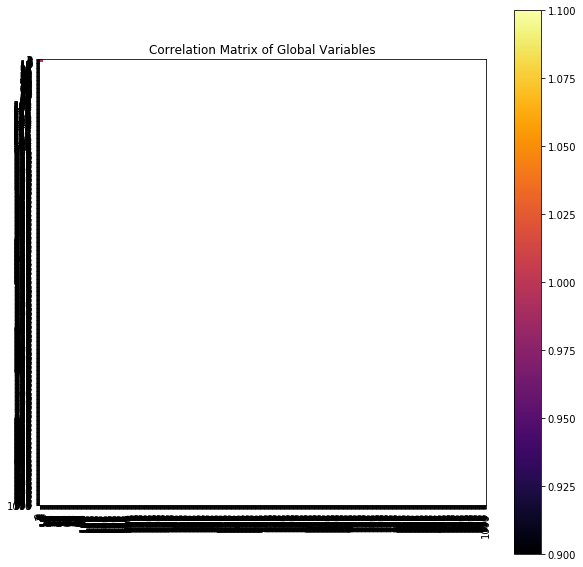

In [149]:
corr = data_pd.head(n=5).corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(data_pd.head(n=5).columns))
plt.xticks(labels,data_pd.head(n=5).columns,rotation=90)
plt.yticks(labels,data_pd.head(n=5).columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar()
plt.show()

In [394]:
# words pandas df

data_pd_words = data_pd.loc[:,1:1000]

In [5]:
# Take out neutral words (increase signal to noise/ remove features)

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.8495


In [7]:
from sklearn.feature_selection import SelectFromModel

SelectFromModel(model)

SelectFromModel(estimator=LogisticRegression(C=3.90625, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [15]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

tuned_parameters = {'alpha': [10 ** a for a in range(-6, -1)]}
clf = GridSearchCV(SGDClassifier(loss='hinge', penalty='elasticnet',l1_ratio=0.15, n_iter=5, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced')
                  , tuned_parameters, cv=10, scoring='f1_macro')

#now clf is the best classifier found given the search space
clf.fit(x_train_s, y_train_s)
#you can find the best alpha here
print(clf.best_params_)  

{'alpha': 0.001}


In [31]:
print(clf.best_estimator_.score(x_val_norm , y_val))

0.84275


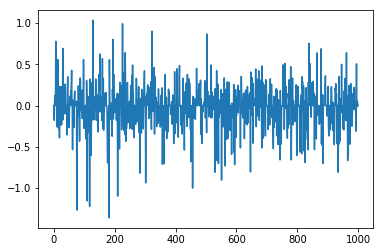

In [549]:
# Before feature reduction

ws =  clf.best_estimator_.coef_
plt.plot(range(len(ws[0])), ws[0])

In [551]:
for i in range(0, clf.best_estimator_.coef_.shape[0]):
    top10 = np.argsort(clf.best_estimator_.coef_[i])[-10:]

In [552]:
bottom10_list = []
for i in range(len(top10)):
    bottom10_list.append((np.where(clf.best_estimator_.coef_[0] == np.sort(clf.best_estimator_.coef_)[0][:10][i])[0][0], np.sort(clf.best_estimator_.coef_)[0][:10][i]))
    
bottom10_list_x = []
for i in range(len(top10)):
    bottom10_list_x.append(sorted(bottom10_list, key=lambda x: x[0])[i][0])
    
bottom10_list_y = []
for i in range(len(top10)):
    bottom10_list_y.append(sorted(bottom10_list, key=lambda x: x[0])[i][1])

In [553]:
top10_list = []
for i in range(len(top10)):
    top10_list.append((top10[i], np.take(clf.best_estimator_.coef_, top10)[i]))
    
top10_list_x = []
for i in range(len(top10)):
    top10_list_x.append(sorted(top10_list, key=lambda x: x[0])[i][0])
    
top10_list_y = []
for i in range(len(top10)):
    top10_list_y.append(sorted(top10_list, key=lambda x: x[0])[i][1])

(-2, 2)

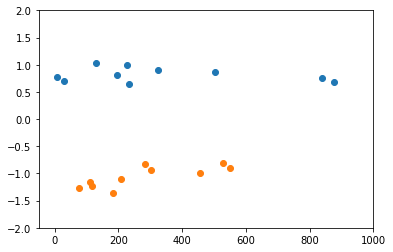

In [554]:
# After feature selection (top 20)

plt.scatter(top10_list_x, top10_list_y)
plt.scatter(bottom10_list_x, bottom10_list_y)
plt.xlim(-50,1000)
plt.ylim(-2,2)

In [395]:
# top 10 words

data_pd[[0] + np.ndarray.tolist(top10)].head(n=5)

,0,235,878,30,838,7,195,503,323,226,129
0,Label,wrong,mark,look,remov,like,place,publish,becom,small,problem
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [396]:
# bottom 10 words

data_pd[[0] + bottom10_list_x].head(n=5)

,0,76,110,118,182,210,283,302,456,529,551
0,Label,end,show,differ,tell,next,hour,fine,impress,within,manag
1,1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Show that largest weights correspond with labels 0 and 1



In [ ]:
# Explore labels for features 'wrong'

In [419]:
list_bool = (data_pd_words[235] == '0') | (data_pd_words[235] == 0)

have_wrong = [not i for i in list_bool]

In [409]:
data_pd[[0, 235]][have_wrong].head(n=10)

,0,235
0,Label,wrong
108,0,1
192,0,1
248,0,1
276,0,1
307,0,1
312,0,1
338,0,1
394,0,1
416,0,1


In [437]:
have_wrong_y = data_pd[[0, 235]][have_wrong][0].values[1:len(data_pd[[0, 235]][have_wrong][0].values)].astype(int)

In [446]:
# Number that have 'wrong' and have label 0, Number that have 'wrong' and have label 1

len(have_wrong_y[have_wrong_y == 0]), len(have_wrong_y[have_wrong_y == 1])

(369, 178)

In [450]:
len(have_wrong_y[have_wrong_y == 0])/len(have_wrong_y[have_wrong_y == 1])

2.0730337078651684

In [447]:
list_bool_dont = (data_pd_words[235] == '0') | (data_pd_words[235] == 0)

dont_have_wrong = list_bool_dont

In [341]:
data_pd[[0, 235]][dont_have_wrong].head(n=5)

,0,235
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0


In [444]:
dont_have_wrong_y = data_pd[[0, 235]][dont_have_wrong][0].values.astype(int)

In [448]:
# Number that don't have 'wrong' and have label 0, Number that don't have 'wrong' and have label 1

len(dont_have_wrong_y[dont_have_wrong_y == 0]), len(dont_have_wrong_y[dont_have_wrong_y == 1])

(9524, 9929)

In [451]:
len(dont_have_wrong_y[dont_have_wrong_y == 0])/len(dont_have_wrong_y[dont_have_wrong_y == 1])

0.9592103937959513

In [449]:
len(dont_have_wrong_y) + len(have_wrong_y)

20000

In [454]:
# Explore labels for features 'loud'

data_pd.iloc[0][data_pd.iloc[0] == 'loud']

965    loud
Name: 0, dtype: object

In [455]:
data_pd[[965]].head(n=5)

,965
0,loud
1,0
2,0
3,0
4,0


In [456]:
list_bool_loud = (data_pd_words[965] == '0') | (data_pd_words[965] == 0)

have_loud = [not i for i in list_bool_loud]

In [457]:
have_loud_y =  data_pd[[0, 965]][have_loud][0].values[1:len(data_pd[[0, 965]][have_loud][0].values)].astype(int)

In [458]:
# Number that have 'loud' and have label 0, Number that have 'loud' and have label 1

len(have_loud_y[have_loud_y == 0]), len(have_loud_y[have_loud_y == 1])

(77, 71)

In [466]:
len(have_loud_y[have_loud_y == 0])/len(have_loud_y[have_loud_y == 1])

1.0845070422535212

In [459]:
list_bool_loud_dont = (data_pd_words[965] == '0') | (data_pd_words[965] == 0)

dont_have_loud = list_bool_loud_dont

In [460]:
dont_have_loud_y = data_pd[[0, 965]][dont_have_loud][0].values.astype(int)

In [461]:
# Number that don't have 'loud' and have label 0, Number that don't have 'loud' and have label 1

len(dont_have_loud_y[dont_have_loud_y == 0]), len(dont_have_loud_y[dont_have_loud_y == 1])

(9816, 10036)

In [467]:
len(dont_have_loud_y[dont_have_loud_y == 0])/len(dont_have_loud_y[dont_have_loud_y == 1])

0.9780789159027501

In [462]:
len(dont_have_loud_y) + len(have_loud_y)

20000

In [ ]:
# Calculate + show table of largest proportion ratios, then train on only the words with the highest ratios




In [483]:
x_train_top20 = []
for i in range(len(x_train)):
    x_train_top20.append(x_train[i][top10_list_x + bottom10_list_x])

In [489]:
x_train_top20[:5]

[array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.])]

In [497]:
# Logistic Regression w/ top20 words

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_top20, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.72175


In [572]:
for i in range(0, clf.best_estimator_.coef_.shape[0]):
    top10 = np.argsort(clf.best_estimator_.coef_[i])[-100:]

In [573]:
top10_list = []
for i in range(len(top10)):
    top10_list.append((top10[i], np.take(clf.best_estimator_.coef_, top10)[i]))
    
top10_list_x = []
for i in range(len(top10)):
    top10_list_x.append(sorted(top10_list, key=lambda x: x[0])[i][0])
    
top10_list_y = []
for i in range(len(top10)):
    top10_list_y.append(sorted(top10_list, key=lambda x: x[0])[i][1])

In [574]:
bottom10_list = []
for i in range(len(top10)):
    bottom10_list.append((np.where(clf.best_estimator_.coef_[0] == np.sort(clf.best_estimator_.coef_)[0][:len(top10)][i])[0][0], np.sort(clf.best_estimator_.coef_)[0][:len(top10)][i]))
    
bottom10_list_x = []
for i in range(len(top10)):
    bottom10_list_x.append(sorted(bottom10_list, key=lambda x: x[0])[i][0])
    
bottom10_list_y = []
for i in range(len(top10)):
    bottom10_list_y.append(sorted(bottom10_list, key=lambda x: x[0])[i][1])

In [558]:
len(top10_list_x + bottom10_list_x)

400

In [542]:
x_train_topx = []
for i in range(len(x_train)):
    x_train_topx.append(x_train[i][top10_list_x + bottom10_list_x])

In [506]:
# Logistic Regression w/ top60 words

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_topx, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.78625


(-2, 2)

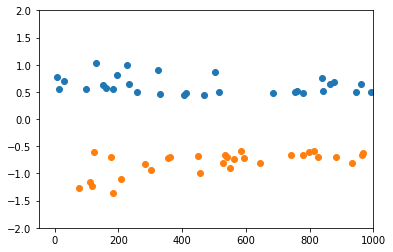

In [564]:
# After feature selection (top 60)

plt.scatter(top10_list_x, top10_list_y)
plt.scatter(bottom10_list_x, bottom10_list_y)
plt.xlim(-50,1000)
plt.ylim(-2,2)

In [524]:
# Logistic Regression w/ top100 words

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_topx, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.80775


(-2, 2)

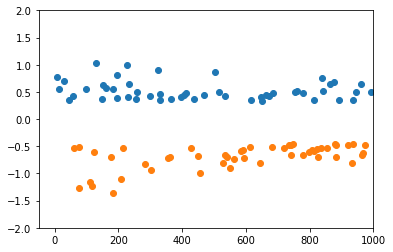

In [571]:
# After feature selection (top 100)

plt.scatter(top10_list_x, top10_list_y)
plt.scatter(bottom10_list_x, bottom10_list_y)
plt.xlim(-50,1000)
plt.ylim(-2,2)

In [545]:
# Optimize

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cs = []
ci = 0.01
for i in range(4):
    ci = 5*ci
    cs.append(ci)

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_topx, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s_norm, y_train_s)
    opt_c.append(model.score(x_val_norm, y_val))

In [546]:
np.argmax(opt_c), opt_c[0], cs[0], opt_c, cs

(2,
 0.78549999999999998,
 0.05,
 [0.78549999999999998,
  0.83550000000000002,
  0.84250000000000003,
  0.84199999999999997],
 [0.05, 0.25, 1.25, 6.25])

In [543]:
# Logistic Regression w/ top400 words

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_topx, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.8435


(-2, 2)

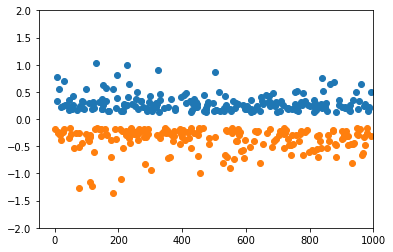

In [560]:
# After feature selection (top 400)

plt.scatter(top10_list_x, top10_list_y)
plt.scatter(bottom10_list_x, bottom10_list_y)
plt.xlim(-50,1000)
plt.ylim(-2,2)

In [537]:
# Logistic Regression w/ top800 words

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_topx, y_train, test_size=0.2, random_state=42)

x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm, y_train_s)

print(model.score(x_val_norm , y_val))

0.84875


In [ ]:
# Best Naive Bayes Model (TF-IDF, optimzed Hyperparameters, train on top words)



In [ ]:
# Explore word co-occurances (increase signal to noise)

In [1]:
# Dylan Preprocessing Datasets

from scipy.stats import percentileofscore
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = np.loadtxt('training_data.txt', skiprows=1)

x_train = data[:,range(1,1001)]
y_train = data[:,0]

# 2) Add in verbosity term
# prereq: 1
verbosity = np.sum(x_train, axis = 1)
verbosity = np.ndarray( shape=(20000,1), buffer=verbosity )
x_train_verbosity = np.append(x_train, verbosity, axis=1)

In [5]:
x_train_verb = x_train_verbosity[:,range(1,1001)]
y_train_verb = y_train

In [6]:
x_train_verb

array([[  0.,   0.,   0., ...,   0.,   0.,  19.],
       [  0.,   0.,   0., ...,   0.,   0.,  61.],
       [  3.,   1.,   0., ...,   0.,   0.,  21.],
       ..., 
       [  0.,   1.,   1., ...,   0.,   0.,  39.],
       [  4.,   0.,   1., ...,   0.,   0.,  56.],
       [  0.,   3.,   0., ...,   0.,   0.,  41.]])

In [8]:
# test set verbosity

data_test = np.loadtxt('test_data.txt', skiprows=1)

x_test = data_test

In [9]:
verbosity_test = np.sum(x_test, axis = 1)
verbosity_test = np.ndarray( shape=(10000,1), buffer=verbosity_test )
x_test_verbosity = np.append(x_test, verbosity_test, axis=1)

In [10]:
x_test_verb = x_test_verbosity[:,range(1,1001)]

In [20]:
x_test_verb

array([[  3.,   1.,   0., ...,   0.,   0.,  14.],
       [  0.,   0.,   1., ...,   0.,   0.,  72.],
       [  0.,   0.,   0., ...,   0.,   0.,  31.],
       ..., 
       [  0.,   1.,   0., ...,   0.,   0.,  11.],
       [  1.,   0.,   0., ...,   0.,   0.,  23.],
       [  1.,   1.,   0., ...,   0.,   0.,  21.]])

In [12]:
# Verbosity + Logistic Regression

from sklearn.linear_model import LogisticRegression

x_train_s_verb, x_val_verb, y_train_s_verb, y_val_verb = train_test_split(x_train_verb, y_train_verb, test_size=0.2, random_state=42)

x_train_s_norm_verb = preprocessing.normalize(x_train_s_verb, norm='l2')
x_val_norm_verb = preprocessing.normalize(x_val_verb, norm='l2')

model = LogisticRegression(penalty='l1', C=3.90625)
model.fit(x_train_s_norm_verb, y_train_s_verb)

print(model.score(x_val_norm_verb, y_val_verb))

0.846


In [ ]:
0.8565

In [18]:
ws = model.coef_
plt.plot(range(len(ws[0])), ws[0])

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [22]:
# Optimize

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cs = []
ci = 0.01
for i in range(6):
    ci = 5*ci
    cs.append(ci)

x_train_s_verb, x_val_verb, y_train_s_verb, y_val_verb = train_test_split(x_train_verb, y_train_verb, test_size=0.2, random_state=42)
x_train_s_norm_verb = preprocessing.normalize(x_train_s_verb, norm='l2')
x_val_norm_verb = preprocessing.normalize(x_val_verb, norm='l2')

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s_norm_verb, y_train_s_verb)
    opt_c.append(model.score(x_val_norm_verb, y_val_verb))

In [23]:
np.argmax(opt_c), opt_c[0], cs[0], opt_c, cs

(3,
 0.64749999999999996,
 0.05,
 [0.64749999999999996,
  0.77324999999999999,
  0.83199999999999996,
  0.84850000000000003,
  0.84499999999999997,
  0.84399999999999997],
 [0.05, 0.25, 1.25, 6.25, 31.25, 156.25])

In [25]:
# Verbosity + Best Linear SVM

from sklearn import svm

x_train_s_verb, x_val_verb, y_train_s_verb, y_val_verb = train_test_split(x_train_verb, y_train_verb, test_size=0.2, random_state=42)

x_train_s_norm_verb = preprocessing.normalize(x_train_s_verb, norm='l2')
x_val_norm_verb = preprocessing.normalize(x_val_verb, norm='l2')

clf = svm.SVC(C=1, kernel='linear')
clf.fit(x_train_s_norm_verb, y_train_s_verb)

print(clf.score(x_val_norm_verb, y_val_verb))

0.82575


In [ ]:
# Normalize data

x_train_norm_verb = preprocessing.normalize(x_train_verb, norm='l2')
x_test_norm_verb = preprocessing.normalize(x_test_verb, norm='l2')

# Optimal Logistic Regression (Verbosity)

model = LogisticRegression(penalty='l1', C=ci)
model.fit(x_train_norm_verb, y_train_verb)

y_pred = clf.predict(x_test_norm_verb)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_opt_log_reg_verbosity.csv', index=False, header=True)

In [ ]:
# Best SVM score

0.8495

In [3]:
original_training_data = np.loadtxt("training_data.txt", skiprows=1)
train = original_training_data

# 4) Add in vocabulary size (% words from entire corpus present in review)
# prereq: 1
train_binary = np.where(train[:,1:] > 0, 1, 0)
raw_vocab = np.sum(train_binary, axis=1)
vocab = raw_vocab/1000
vocab = np.ndarray( shape=(20000,1), buffer=vocab )
train_vocab = np.append( train, vocab, axis=1 )

In [4]:
x_train_vocab = train_vocab[:,range(1,1002)]
y_train_vocab = train_vocab[:,0]

In [5]:
x_train_vocab

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.017],
       [ 3.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.044],
       [ 0.   ,  3.   ,  1.   , ...,  0.   ,  0.   ,  0.016],
       ..., 
       [ 3.   ,  0.   ,  1.   , ...,  0.   ,  0.   ,  0.034],
       [ 2.   ,  4.   ,  0.   , ...,  0.   ,  0.   ,  0.042],
       [ 0.   ,  0.   ,  3.   , ...,  0.   ,  0.   ,  0.037]])

In [6]:
# Test data

data_test = np.loadtxt('test_data.txt', skiprows=1)
test = data_test

In [7]:
test_binary = np.where(test[:,1:] > 0, 1, 0)
raw_vocab = np.sum(test_binary, axis=1)
vocab = raw_vocab/1000
vocab = np.ndarray( shape=(10000,1), buffer=vocab )
x_test_vocab = np.append( test, vocab, axis=1 )

In [662]:
x_test_vocab[0].shape

(1001,)

In [663]:
x_train_vocab[0].shape

(1001,)

In [ ]:
3.90625

In [9]:
# Vocab Size + Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

x_train_s_vocab, x_val_vocab, y_train_s_vocab, y_val_vocab = train_test_split(x_train_vocab, y_train_vocab, test_size=0.2, random_state=42)

x_train_s_norm_vocab = preprocessing.normalize(x_train_s_vocab, norm='l2')
x_val_norm_vocab = preprocessing.normalize(x_val_vocab, norm='l2')

model = LogisticRegression(penalty='l1', C=3.3)
model.fit(x_train_s_norm_vocab, y_train_s_vocab)

print(model.score(x_val_norm_vocab, y_val_vocab))

0.85025


In [14]:
# Normalize data

x_train_norm_vocab = preprocessing.normalize(x_train_vocab, norm='l2')
x_test_norm_vocab = preprocessing.normalize(x_test_vocab, norm='l2')

# Optimal Logistic Regression (Verbosity)

model = LogisticRegression(penalty='l1', C=3.3)
model.fit(x_train_norm_vocab, y_train_vocab)

y_pred = model.predict(x_test_norm_vocab)

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submission_opt_log_reg_vocab_size.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [618]:
# Optimize

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cs = []
ci = 0.01
for i in range(6):
    ci = 5*ci
    cs.append(ci)

x_train_s_vocab, x_val_vocab, y_train_s_vocab, y_val_vocab = train_test_split(x_train_vocab, y_train_vocab, test_size=0.2, random_state=42)
x_train_s_norm_vocab = preprocessing.normalize(x_train_s_vocab, norm='l2')
x_val_norm_vocab = preprocessing.normalize(x_val_vocab, norm='l2')

opt_c = []
for ci in cs:
    model = LogisticRegression(penalty='l1', C=ci)
    model.fit(x_train_s_norm_vocab, y_train_s_vocab)
    opt_c.append(model.score(x_val_norm_vocab, y_val_vocab))

In [619]:
np.argmax(opt_c), opt_c[0], cs[0], opt_c, cs

(3,
 0.76700000000000002,
 0.05,
 [0.76700000000000002,
  0.82674999999999998,
  0.84799999999999998,
  0.84975000000000001,
  0.84824999999999995,
  0.84699999999999998],
 [0.05, 0.25, 1.25, 6.25, 31.25, 156.25])

In [588]:
# Stack Logistic Regression, Random Forest, LinearSVM, Multinomial NB

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=30)

,Id,Prediction0,Prediction1,Prediction2,Prediction3
0,1,1,1,1,1
1,2,1,1,1,1
2,3,0,0,1,0
3,4,0,0,0,0
4,5,0,0,1,1
5,6,0,0,0,0
6,7,1,1,1,1
7,8,1,1,1,1
8,9,1,1,1,1
9,10,0,0,0,0


In [596]:
predictDF = np.array(concat_sub.iloc[:, 1:5])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [597]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_svm_logreg_rfo_Multinomial_NB.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [607]:
# Stack Logistic Regression, Random Forest, LinearSVM, GBM

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=30)

,Id,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4
0,1,1,1,1,1,1
1,2,1,1,1,1,1
2,3,0,0,0,1,0
3,4,0,0,0,0,0
4,5,0,0,0,1,1
5,6,0,0,0,0,0
6,7,1,1,1,1,1
7,8,1,1,1,1,1
8,9,1,1,1,1,1
9,10,0,0,0,0,0


In [608]:
predictDF = np.array(concat_sub.iloc[:, 1:5])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [609]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_svm_logreg_rfo_GBM.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [610]:
# Stack Logistic Regression, Random Forest, LinearSVM, GBM, Multinomial NB

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=30)

,Id,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4
0,1,1,1,1,1,1
1,2,1,1,1,1,1
2,3,0,0,0,1,0
3,4,0,0,0,0,0
4,5,0,0,0,1,1
5,6,0,0,0,0,0
6,7,1,1,1,1,1
7,8,1,1,1,1,1
8,9,1,1,1,1,1
9,10,0,0,0,0,0


In [611]:
predictDF = np.array(concat_sub.iloc[:, 1:6])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [612]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_svm_logreg_rfo_GBM_Mulinomial_Bayes.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [15]:
# Stack Logistic Regression (vocab size), Random Forest, LinearSVM

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=30)

,Id,Prediction0,Prediction1,Prediction2
0,1,1,1,1
1,2,1,1,1
2,3,0,0,0
3,4,0,0,0
4,5,0,0,1
5,6,0,0,0
6,7,1,1,1
7,8,1,1,1
8,9,1,1,1
9,10,0,0,0


In [16]:
predictDF = np.array(concat_sub.iloc[:, 1:6])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [17]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_svm_logreg_vocab_size_rfo.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [62]:
# Stack Logistic Regression, Random Forest, LinearSVM times 2, NN

# Majority Stacking

import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=10)

,Id,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4
0,1,1,1,1,1,1
1,2,1,1,1,1,1
2,3,0,0,0,0,0
3,4,0,0,0,0,0
4,5,0,0,0,0,1
5,6,0,0,0,0,0
6,7,1,1,1,1,1
7,8,1,1,1,1,1
8,9,1,1,1,1,1
9,10,0,0,0,0,0


In [57]:
# check correlation

concat_sub.corr()

,Id,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4
Id,1.000000,0.005802,0.006020,0.000389,0.005802,0.017638
Prediction0,0.005802,1.000000,0.905069,0.906198,1.000000,0.786237
Prediction1,0.006020,0.905069,1.000000,0.887909,0.905069,0.768188
Prediction2,0.000389,0.906198,0.887909,1.000000,0.906198,0.762519
Prediction3,0.005802,1.000000,0.905069,0.906198,1.000000,0.786237
Prediction4,0.017638,0.786237,0.768188,0.762519,0.786237,1.000000


In [63]:
predictDF = np.array(concat_sub.iloc[:, 1:7])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [65]:
# Majority stack

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_2svm__logreg_rfo_NN.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [ ]:
# Stacking Analysis

In [ ]:
# Normalize data
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train_top, y_train, test_size=0.2, random_state=42)
x_train_s_norm = preprocessing.normalize(x_train_s, norm='l2')
x_val_norm = preprocessing.normalize(x_val, norm='l2')

In [73]:
# Best Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Normalize data
x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model1 = LogisticRegression(penalty='l1', C=3.90625)
model1.fit(x_train_s_norm, y_train_s)

y_pred = model1.predict(x_val_norm)

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_logistic_regression_CV.csv', index=False, header=True)

   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           1
6   7           1
7   8           0
8   9           0
9  10           1


In [75]:
# Best Random Forest

from sklearn.ensemble import RandomForestClassifier

# Normalize data

x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

model2 = RandomForestClassifier(n_estimators=1000)
model2.fit(x_train_s_norm, y_train_s)

y_pred = model2.predict(x_val_norm)

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_rfo_CV.csv', index=False, header=True)

   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           0
6   7           1
7   8           0
8   9           0
9  10           1


In [76]:
# Best SVC

from sklearn import svm

model3 = svm.SVC(C=1, kernel='linear')
model3.fit(x_train_s_norm, y_train_s)

y_pred = model3.predict(x_val_norm)

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_SVC_CV.csv', index=False, header=True)

   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           1
6   7           1
7   8           0
8   9           0
9  10           1


In [70]:
# Best NN

from keras.models import Sequential
from keras.layers import Dense, Dropout

model4 = Sequential()
model4.add(Dense(120, input_shape=(1000,)))
model4.add(Activation('sigmoid'))
model4.add(Dropout(0.7))
model4.add(Dense(20))
model4.add(Activation('sigmoid'))

model4.add(Dense(2))
model4.add(Activation('softmax'))
    
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
model4.fit(x_train_s_norm, y_train_s_hot, epochs=5, batch_size=32, verbose=1)

y_pred = model4.predict_classes(x_val_norm)

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_Dense_NN_CV.csv', index=False, header=True)

Epoch 1/5
16000/16000 [==============================] - 5s 296us/step - loss: 0.7040 - acc: 0.5305
Epoch 2/5
16000/16000 [==============================] - 4s 248us/step - loss: 0.6531 - acc: 0.6123
Epoch 3/5
16000/16000 [==============================] - 4s 259us/step - loss: 0.5728 - acc: 0.6996
Epoch 4/5
16000/16000 [==============================] - 4s 237us/step - loss: 0.5129 - acc: 0.7445
Epoch 5/5
16000/16000 [==============================] - 4s 240us/step - loss: 0.4726 - acc: 0.7751
   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           1
6   7           1
7   8           1
8   9           0
9  10           1


In [95]:
# Best Naive Bayes

from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score

label_weights = pd.read_csv("./Logistic_L1_weights_229.txt", delimiter="\t")

def NBayesCrossVal(whichweights, X_orig, Y_orig, laplace=1, kfold=5, modeltype='multinomial'):
    
    N, D = X_orig.shape
    nhypers = whichweights.shape[0] # nhypers X nweights
    models = []
    val_scores = []

    for hyper in range(nhypers): 
        theseweights = whichweights[hyper, :]
        X = X_orig[:, theseweights.astype('bool')]
        if modeltype == 'bernoulli':
            model = BernoulliNB(alpha=1.0, fit_prior=True)
        elif modeltype == 'multinomial':
            model = MultinomialNB(alpha=1.0, fit_prior=True)
        scores = cross_val_score(model, X, Y_orig, cv=kfold)
        models.append(model)
        val_scores.append(scores)
        
    val_scores = np.array(val_scores)
    mean_val_scores = np.mean(val_scores, axis=1)
    hyper_best_i = np.argmax(mean_val_scores)
    print(hyper_best_i, mean_val_scores[hyper_best_i]) #c_best,
    
    return val_scores, mean_val_scores, hyper_best_i, models

nhypers = 20
Qs = np.linspace(60, 65, nhypers) # 0.1% of 1000 is 1
whichweights = np.zeros((nhypers, x_train_s.shape[1]))
abs_weights = np.absolute(label_weights.weights)
for i, Q in enumerate(Qs):
    cutoff = np.percentile(a=abs_weights, q=Q)
    whichweights[i, :] = np.greater_equal(abs_weights, cutoff)

percentiles = [np.percentile(a=np.absolute(label_weights.weights), q=Q) for Q in Qs]

In [96]:
val_scores, mean_val_scores, hyper_best_i, models = NBayesCrossVal(whichweights, x_train_s, y_train_s, 1, 5, 'multinomial')

19 0.851623998028


0.202192206491
65.0


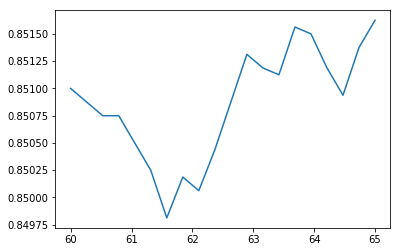

In [99]:
print(percentiles[hyper_best_i])
print(Qs[hyper_best_i])
plt.plot(Qs, mean_val_scores)
plt.show()
bestweights = whichweights[hyper_best_i, :] #models[33] # No, all the models are the same!
bestmodel = models[0] # All the models are the same!
bestmatrix = x_train_s[:, bestweights.astype('bool')]
bestmodel.fit(bestmatrix, y_train_s)


In [100]:
y_pred = bestmodel.predict(x_val[:, bestweights.astype('bool')])

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_Naive_Bayes_Eric_CV.csv', index=False, header=True)

   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           1
6   7           1
7   8           0
8   9           0
9  10           1


In [158]:
# Dylan Logistic Regression

# Copied from his ...reg_optimal.py
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer

# Import training data
original_training_data = np.loadtxt("training_data.txt", skiprows=1)
# Import test data
original_test_data = np.loadtxt("test_data.txt", skiprows=1)
# Produce joint tf-idf-generating dataset
pre_tf_idf = np.append(original_training_data[:,1:], original_test_data, axis=0)

# Compute tf-idf
tfidf_trans = TfidfTransformer()
full_tf_idf = tfidf_trans.fit_transform(pre_tf_idf)
full_tf_idf = full_tf_idf.toarray()

# Reconstitute training data
train_labels = original_training_data[:,0]
train_labels = train_labels.reshape(20000,1)
training_tf_idf = np.append(train_labels, full_tf_idf[0:20000,:], axis=1)

# Reconstitute test data
test_tf_idf = full_tf_idf[20000:, :]

# Train model on tf-idf training data
training_x = training_tf_idf[:,1:]
training_y = training_tf_idf[:,0]

# END copy
# Now rename variables to match the rest of this notebook

x_train_s_tfifd, x_val_tfifd, y_train_s_tfifd, y_val_tfifd = train_test_split(training_x, training_y, test_size=0.2, random_state=42)

In [159]:
model = LogisticRegression(penalty='l2', C = 0.9483) #0.975
model.fit(x_train_s_tfifd, y_train_s_tfifd)

LogisticRegression(C=0.9483, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [160]:
y_pred = model.predict(x_val_tfifd)

submission = pd.DataFrame({'Id': range(1, len(x_val_norm)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_Dylan_TFIFDall_0.9483_CV.csv', index=False, header=True)

   Id  Prediction
0   1           0
1   2           0
2   3           0
3   4           1
4   5           1
5   6           1
6   7           1
7   8           0
8   9           0
9  10           1


In [67]:
from sklearn.metrics import accuracy_score

In [79]:
# Stacking Prediction: Logistic Regression, Random Forest, SVM*2, NN

import os

sub_path = "submissions_CV/stack1/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)

predictDF = np.array(concat_sub.iloc[:, 1:7])
majority = np.mean(predictDF, axis=1)
stacked = (majority > 0.5) + 0

y_pred = stacked
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
accuracy_score(y_val, y_pred)

0.85150000000000003

In [81]:
# Stacking Prediction: Logistic Regression, Random Forest, SVM

import os

sub_path = "submissions_CV/stack2/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)

predictDF = np.array(concat_sub.iloc[:, 1:7])
majority = np.mean(predictDF, axis=1)
stacked = (majority > 0.5) + 0

y_pred = stacked
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [82]:
accuracy_score(y_val, y_pred)

0.85375000000000001

In [83]:
# Stacking Prediction: Logistic Regression, SVM, NN

import os

sub_path = "submissions_CV/stack3/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)

predictDF = np.array(concat_sub.iloc[:, 1:7])
majority = np.mean(predictDF, axis=1)
stacked = (majority > 0.5) + 0

y_pred = stacked
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [85]:
accuracy_score(y_val, y_pred)

0.85099999999999998

In [ ]:
# Stacking Prediction: Logistic Regression (Dylan), Random Forest, SVM, Naive Bayes (Eric)*2

import os

sub_path = "submissions_CV/stack4/"
all_files = os.listdir(sub_path)
all_files = sorted(all_files)
print(all_files)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)

predictDF = np.array(concat_sub.iloc[:, 1:7])
# majority = np.mean(predictDF, axis=1)

bestacc = [0.854, 0.853, 0.851, 0.833]
bestaccsum = sum(bestacc)

def weightedMajority(predictdf):
    majority = []
    for row in range(len(y_val)):
        wmean = (bestacc[0]*predictdf[row, 0] + bestacc[1]*predictdf[row, 1] + bestacc[2]*predictdf[row, 2] + bestacc[3]*predictdf[row, 3]) / (bestaccsum)
        majority.append(wmean)
        if row % 10 == 0:
            print(str(row))
    majority = np.array(majority)
    return majority

majority = weightedMajority(predictDF)

if False:
    stacked = majority > 0.5
    y_pred = stacked
    y_pred

In [172]:
predictDF[6, 3]

1

In [166]:
np.sum(y_pred)
len(y_pred)

4000

In [156]:
accuracy_score(y_val, y_pred)

0.85575000000000001

In [ ]:
0.85575000000000001

In [ ]:
0.85624999999999996

In [ ]:
0.85675000000000001

In [ ]:
# Final Stack #3: Logistic Regression (Dylan), Random Forest, SVM, Naive Bayes (Eric)

In [144]:
# Eric Final (whole training set)

from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score

label_weights = pd.read_csv("./Logistic_L1_weights_229.txt", delimiter="\t")

nhypers = 10
Qs = np.linspace(61, 65, nhypers) # 0.1% of 1000 is 1
whichweights = np.zeros((nhypers, x_train.shape[1]))
abs_weights = np.absolute(label_weights.weights)
for i, Q in enumerate(Qs):
    cutoff = np.percentile(a=abs_weights, q=Q)
    whichweights[i, :] = np.greater_equal(abs_weights, cutoff)

percentiles = [np.percentile(a=np.absolute(label_weights.weights), q=Q) for Q in Qs]

In [145]:
val_scores, mean_val_scores, hyper_best_i, models = NBayesCrossVal(whichweights, x_train, y_train, 1, 5, 'multinomial')

8 0.854149230309


0.199385044853
64.5555555556


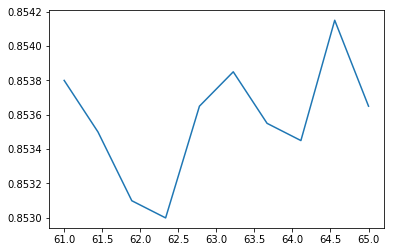

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [146]:
print(percentiles[hyper_best_i])
print(Qs[hyper_best_i])
plt.plot(Qs, mean_val_scores)
plt.show()
bestweights = whichweights[hyper_best_i, :] #models[33] # No, all the models are the same!
bestmodel = models[0] # All the models are the same!
bestmatrix = x_train[:, bestweights.astype('bool')]
bestmodel.fit(bestmatrix, y_train)

In [147]:
y_pred = bestmodel.predict(x_test[:, bestweights.astype('bool')])

submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions_CV/stack1/submission_optimal_Naive_Bayes_Eric_Final.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [161]:
# Dylan Final

# Copied from his ...reg_optimal.py
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer

# Import training data
original_training_data = np.loadtxt("training_data.txt", skiprows=1)
# Import test data
original_test_data = np.loadtxt("test_data.txt", skiprows=1)
# Produce joint tf-idf-generating dataset
pre_tf_idf = np.append(original_training_data[:,1:], original_test_data, axis=0)

# Compute tf-idf
tfidf_trans = TfidfTransformer()
full_tf_idf = tfidf_trans.fit_transform(pre_tf_idf)
full_tf_idf = full_tf_idf.toarray()

# Reconstitute training data
train_labels = original_training_data[:,0]
train_labels = train_labels.reshape(20000,1)
training_tf_idf = np.append(train_labels, full_tf_idf[0:20000,:], axis=1)

# Reconstitute test data
test_tf_idf = full_tf_idf[20000:, :]

# Train model on tf-idf training data
training_x = training_tf_idf[:,1:]
training_y = training_tf_idf[:,0]

In [162]:
model = LogisticRegression(penalty='l2', C = 0.9483)
model.fit(training_x, training_y)

LogisticRegression(C=0.9483, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [163]:
y_pred = model.predict(test_tf_idf)

submission = pd.DataFrame({'Id': range(1, len(test_tf_idf)+1), 'Prediction': [int(x) for x in y_pred]})
print(submission.head(10))

submission.to_csv('submissions/submission_optimal_Dylan_TFIFDall_0.9483_Final.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0


In [152]:
import os

sub_path = "submissions/"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "Prediction" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head(n=10)

,Id,Prediction0,Prediction1,Prediction2,Prediction3
0,1,1,1,1,1
1,2,1,1,1,1
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,1
5,6,0,0,0,0
6,7,1,1,1,1
7,8,1,1,1,1
8,9,1,1,1,1
9,10,0,0,0,0


In [153]:
predictDF = np.array(concat_sub.iloc[:, 1:6])
predictDF[0:5, ] #.head()
majority = np.mean(predictDF, axis=1)
majority[0:5]
stacked = (majority > 0.5) + 0
stacked[0:15]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [154]:
submission = pd.DataFrame({'Id': range(1, len(x_test)+1), 'Prediction': [int(x) for x in stacked]})
print(submission.head(10))

submission.to_csv('submission_majority_stack_Final_Stack_3.csv', index=False, header=True)

   Id  Prediction
0   1           1
1   2           1
2   3           0
3   4           0
4   5           0
5   6           0
6   7           1
7   8           1
8   9           1
9  10           0
